## 시도별 (광역자치단체) 주소 1000개 임의 추출

In [3]:
import glob
from random import sample
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 파일명 불러오기
all_files = glob.glob("주소/*.txt")

In [3]:
# of samples
n = 1000
rs = pd.DataFrame()

for i in range(0, len(all_files)):
    temp = list(open(all_files[i], "r"))
    rs[all_files[i][6:10]] = list(map(lambda x: ' '.join(x.split('|')[3:7]), sample(temp, n)))

In [4]:
rs_time = pd.read_excel("rs_time_notebook.xlsx", index_col = "Unnamed: 0")

In [5]:
regions = list(rs.columns)
regions

['강원도.',
 '경기도.',
 '경상남도',
 '경상북도',
 '광주광역',
 '대구광역',
 '대전광역',
 '부산광역',
 '서울특별',
 '세종특별',
 '울산광역',
 '인천광역',
 '전라남도',
 '전라북도',
 '제주특별',
 '충청남도',
 '충청북도']

## 응급실 도착 시간 웹크롤링

In [6]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import pyautogui
import time

In [7]:
rs_time = rs_time.replace(np.nan, 'NaN', regex=True)

In [ ]:
driver = webdriver.Chrome(r"C:\Users\heeyoungmy\OneDrive - 연세대학교 (Yonsei University)\Programming\응모\chromedriver.exe")
t0 = time.time()
t1 = time.time() 

for k in range(0,10):
    for region in regions:
        for i in range(0, n):
            # basic algorithm
            # rs_time[region][i] = rs[region][i]

            if t1-t0 > 3600*(5+1/2):   
                break
                
            if rs_time[region][i] == '':
                rs_time[region][i] = 'NaN'

            if rs_time[region][i][0].isnumeric() & (not ("시간" in rs_time[region][i])):
                pass

            else:
                try:
                    driver.get("https://map.naver.com/v5/directions/-/-/-/car")
                    driver.implicitly_wait(1)
                    input_box = driver.find_element_by_id('directionStart0')
                    input_box.send_keys(rs[region][i])


                #time.sleep(0.2)
                    pyautogui.press('enter')
                    time.sleep(0.5)
                    driver.find_element_by_id('directionGoal1').send_keys("응급실")
                    #time.sleep(0.2)
                    pyautogui.press('enter')
                    time.sleep(0.5)
                    driver.find_element_by_css_selector('button.btn.btn_direction.active').click()
                    time.sleep(0.5)
                    rs_time[region][i] =  driver.find_element_by_tag_name('readable-duration').text
                    
                    print(i, rs_time[region][i])

                except:

                    print(i, "error")

            t1 = time.time() 

67 28분
130 5분
132 24분
153 2분
177 28분
180 10분
224 46분
359 36분
373 30분
387 11분
407 23분
422 39분
447 4분
457 error
473 error
513 error
519 error
582 error
590 error
597 error
662 error
726 error
783 error
857 error
882 error
920 error
938 error
943 error


# Raw Data Preprocessing

In [254]:
rs_time = pd.read_excel("rs_time.xlsx", index_col = "Unnamed: 0")

# rename the columns
rs_time = rs_time.rename(columns={'강원도.': 'Gangwon','경기도.':'Gyeongi','경상남도':'Gyeongnam','경상북도':'Gyeonbuk','광주광역':'Gwangju','대구광역':'Daegu','대전광역':'Daejeon','부산광역':'Busan','서울특별':'Seoul','세종특별':'Sejong','울산광역':'Ulsan','인천광역':'Incheon','전라남도':'Jeonnam','전라북도':'Jeonbuk','제주특별':'Jeju','충청남도':'Chungnam','충청북도':'Chungbuk'})
regions = rs_time.columns

In [255]:
# 시간을 분으로 환산
for col in rs_time.columns:
    rs_time[col] = rs_time.apply(lambda x: int(x[col].split('시간')[0])*60 if ('시간' in x[col] and (not ('분' in x[col]))) 
                                  else int(x[col].split('시간')[0])*60 + int(x[col].split('시간')[1][:-1]) if ('시간' in x[col]) 
                                  else int(x[col][:-1]), axis = 1)

In [256]:
# 오래걸리는 상위 5퍼센트는 삭제. 삭제 근거는 1변수 선형회귀를 통해 제일 높은 R-squared 값이 나오는 삭제 퍼센트 비율 선택
rs_percentile = rs_time.quantile(.95)

In [257]:
for col in rs_time.columns:
    rs_time[col] = rs_time.apply(lambda x: rs_percentile[col] if x[col] > rs_percentile[col]
                                  else x[col], axis=1) 

In [151]:
import matplotlib.font_manager as fm

font_path = r'NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)

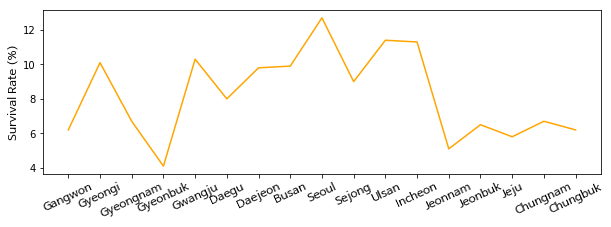

In [152]:
# 심장마비 생존율 데이터 
# http://www.kdca.go.kr/contents.es?mid=a20601030502
alive_ratio = [6.2, 10.1, 6.7, 4.1, 10.3, 8.0, 9.8, 9.9, 12.7, 9.0, 11.4, 11.3, 5.1, 6.5, 5.8, 6.7, 6.2]

# 시각화
plt.figure(figsize=(10,3))
plt.plot(regions, alive_ratio,color='orange')
plt.xticks(regions, rotation =25, fontproperties=fontprop)
plt.ylabel('Survival Rate (%)', fontproperties=fontprop)

# plt.title(col, fontproperties=fontprop)
# plt.xlabel('minutes', fontproperties=fontprop)
# plt.ylabel('samples (n)', fontproperties=fontprop)
plt.show()

Text(0, 0.5, 'Average Age')

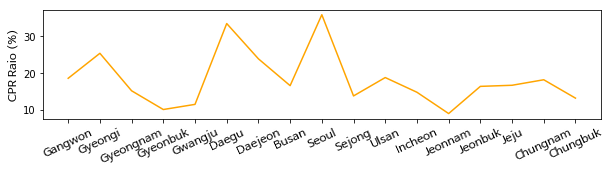

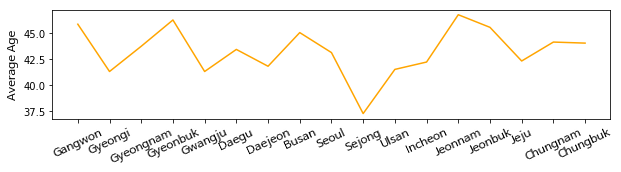

In [153]:
# 심폐소생술 시행률
# http://www.kdca.go.kr/contents.es?mid=a20601030504
# 2017
cpr_ratio = [18.5, 25.3, 15.1, 10.0, 11.4, 33.4, 23.8, 16.5, 35.8, 13.7, 18.7, 14.7, 8.9, 16.3, 16.6, 18.1, 13.1]

# 시각화
plt.figure(figsize=(10,2))
plt.plot(regions, cpr_ratio, color='orange')
plt.xticks(regions, rotation =25, fontproperties=fontprop)
plt.ylabel('CPR Raio (%)', fontproperties=fontprop)

# 평균 나이
# http://27.101.213.4/
average_age = [45.8, 41.3, 43.7, 46.2, 41.3, 43.4, 41.8, 45, 43.1, 37.3, 41.5, 42.2, 46.7, 45.5, 42.3, 44.1,44]

plt.figure(figsize=(10,2))
plt.plot(regions, average_age, color='orange')
plt.xticks(regions, rotation =25, fontproperties=fontprop)
plt.ylabel('Average Age', fontproperties=fontprop)


# Single Variable Linear Regression

In [258]:
import statsmodels.api as sm

In [259]:
# 하위 95%에 대해서만 선형회귀 진행
X = list(rs_time.mean())
X_all = [0]*len(X)

# set exercise as the dependent variable
y = list(alive_ratio)

for i in range(0,len(X)):
    X_all[i] = [1,X[i]]

# perform a regression
reg = sm.OLS(y, X_all).fit()
reg.summary()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     38.99
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           1.57e-05
Time:                        18:28:05   Log-Likelihood:                -28.449
No. Observations:                  17   AIC:                             60.90
Df Residuals:                      15   BIC:                             62.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9808      0.831     15.612      0.000      11.209      14.753
x1            -0.3395      0.054     -6.244      0.000      -0.455      -0.224
==============================================================================
Omnibus:                        1.047   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.831
Skew:                           0.491   Prob(JB):                        0.660
Kurtosis:                       2.545   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

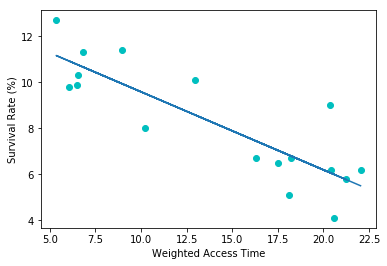

In [260]:
ypred = reg.predict(X_all) 

plt.ylabel('Survival Rate (%)')
plt.xlabel("Weighted Access Time")
plt.plot(X,y,'co')
plt.plot(X,ypred)

# Multiple Variable Regression

In [261]:
# Standardization
from sklearn import preprocessing

X1 = list(rs_time.mean())
X2 = cpr_ratio
X3 = average_age

X1_scaled = preprocessing.scale(X1)
X2_scaled = preprocessing.scale(X2)
X3_scaled = preprocessing.scale(X3)

# create placeholder list for the independent variables
X_all = [0]*len(X1)
X_all_scaled = [0]*len(X1)

# set exercise as the dependent variable
y = list(alive_ratio)

for i in range(0,len(X)):
    X_all_scaled[i] = [1,X1_scaled[i], X2_scaled[i], X3_scaled[i]]
    X_all[i] = [1,X1[i], X2[i], X3[i]]

In [262]:
# perform a regression
reg = sm.OLS(y, X_all).fit()
reg.summary()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     30.49
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           3.76e-06
Time:                        18:28:12   Log-Likelihood:                -21.624
No. Observations:                  17   AIC:                             51.25
Df Residuals:                      13   BIC:                             54.58
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.6144      4.786      6.187      0.000      19.274      39.954
x1            -0.2813      0.045     -6.218      0.000      -0.379      -0.184
x2             0.0359      0.037      0.959      0.355      -0.045       0.117
x3            -0.4186      0.109     -3.826      0.002      -0.655      -0.182
==============================================================================
Omnibus:                        0.516   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.558
Skew:                          -0.334   Prob(JB):                        0.757
Kurtosis:                       2.416   Cond. No.                         981.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Raw data check

Gangwon


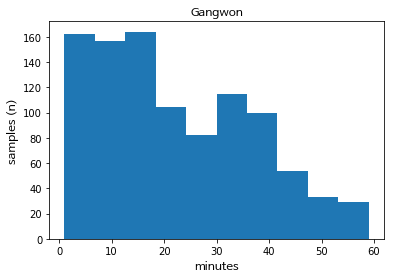

Gyeongi


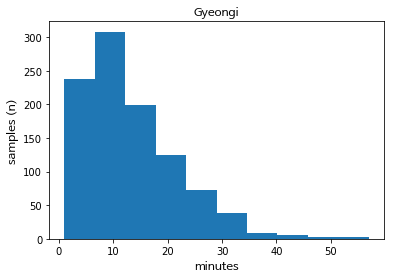

Gyeongnam


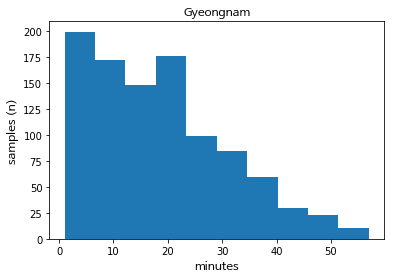

Gyeonbuk


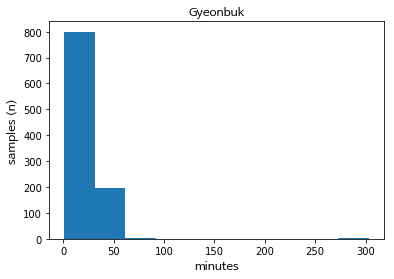

Gwangju


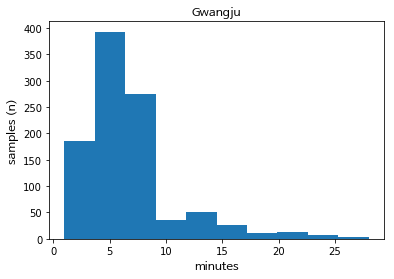

Daegu


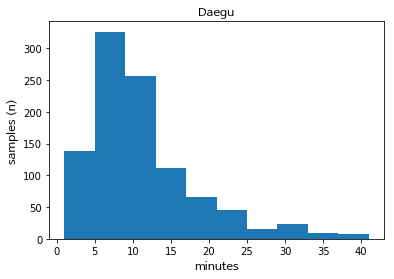

Daejeon


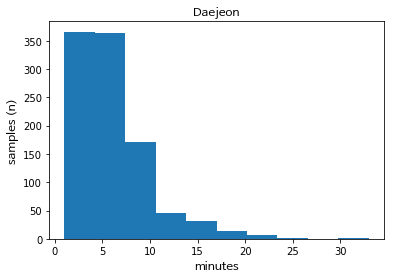

Busan


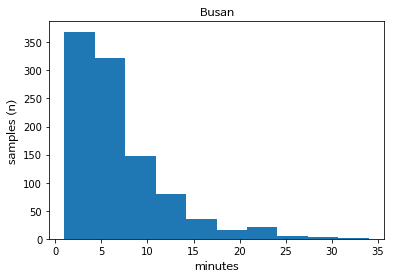

Seoul


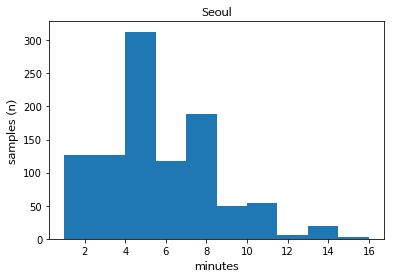

Sejong


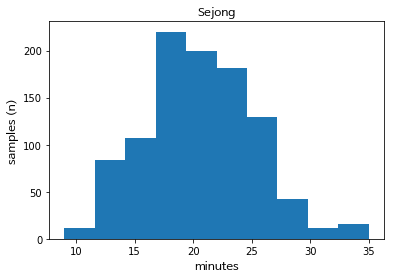

Ulsan


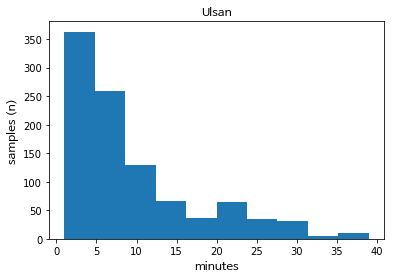

Incheon


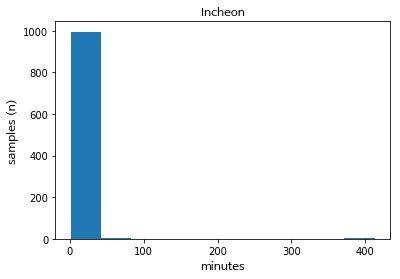

Jeonnam


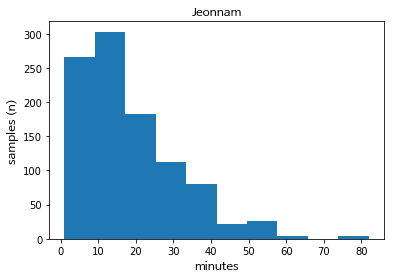

Jeonbuk


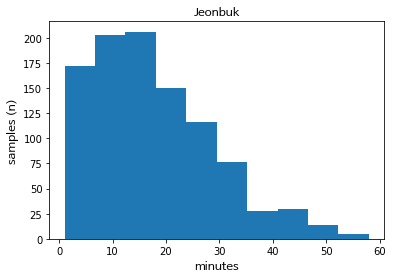

Jeju


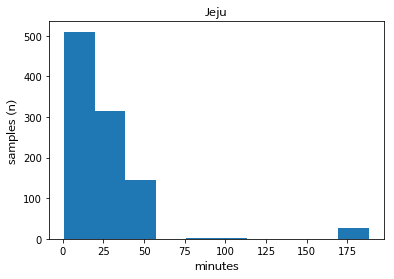

Chungnam


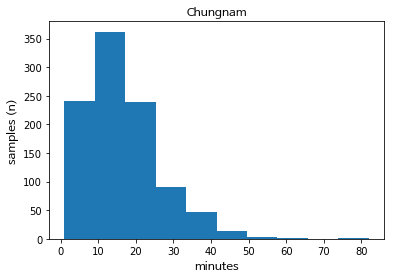

Chungbuk


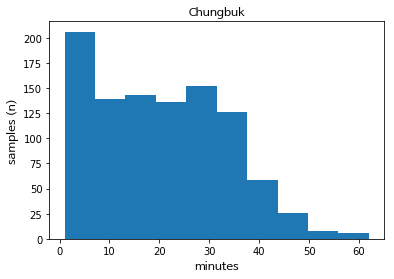

In [88]:
for col in rs_time.columns:
    print(col)
    plt.hist(list(rs_time[col]))
    plt.title(col, fontproperties=fontprop)
    plt.xlabel('minutes', fontproperties=fontprop)
    plt.ylabel('samples (n)', fontproperties=fontprop)
    plt.show()

# 접근성 차이 시각화

In [213]:
srmy = rs_time.describe()

,Gangwon,Gyeongi,Gyeongnam,Gyeonbuk,Gwangju,Daegu,Daejeon,Busan,Seoul,Sejong,Ulsan,Incheon,Jeonnam,Jeonbuk,Jeju,Chungnam,Chungbuk
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,22.03,12.96,18.23,20.60,6.56,10.22,6.03,6.49,5.35,20.38,8.93,6.83,18.10,17.51,21.25,16.31,20.43
std,14.36,7.75,11.70,12.96,3.60,6.24,3.23,4.31,2.45,4.30,7.58,5.27,11.51,10.64,14.40,8.83,12.13
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,9.00,7.00,8.00,10.00,4.00,6.00,4.00,3.00,3.00,17.00,3.00,4.00,9.00,9.00,8.00,10.00,9.00
50%,19.00,12.00,17.00,19.00,6.00,9.00,5.00,6.00,5.00,20.00,6.00,5.00,16.00,16.00,19.00,15.00,20.00
75%,34.00,18.00,26.00,29.00,8.00,13.00,8.00,8.00,7.00,23.00,12.00,8.00,25.00,25.00,33.00,21.00,31.00
max,49.00,29.00,42.00,48.00,16.00,25.00,14.00,17.00,10.00,28.00,27.00,22.00,43.00,40.00,48.00,36.00,42.00


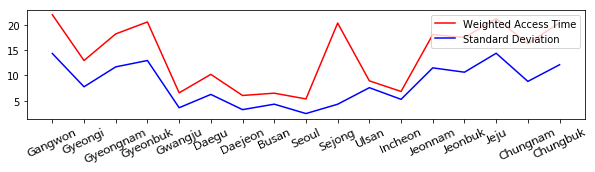

In [244]:
plt.figure(figsize=(10,2))
plt.plot(regions, srmy[1:2].transpose(), color='red')
plt.plot(regions, srmy[2:3].transpose(), color='blue')
#plt.title("Weighted Access Time", fontproperties=fontprop)
plt.xticks(regions, rotation =25, fontproperties=fontprop)
plt.legend(["Weighted Access Time", "Standard Deviation"], loc="upper right")
plt.show()

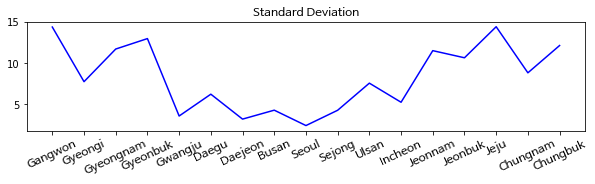

In [236]:
plt.figure(figsize=(10,2))
plt.plot(regions, srmy[2:3].transpose(), color='blue')
plt.title("Standard Deviation", fontproperties=fontprop)
plt.xticks(regions, rotation =25, fontproperties=fontprop)
#plt.ylabel(, fontproperties=fontprop)
plt.show()

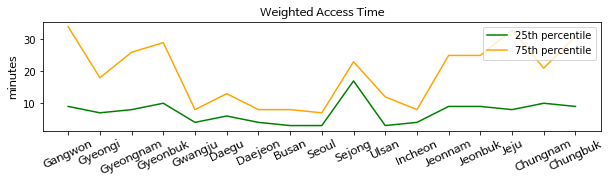

In [253]:
# 접근성 percentile

plt.figure(figsize=(10,2))
plt.plot(regions, srmy[4:5].transpose(), color='green')
plt.plot(regions, srmy[6:7].transpose(), color='orange')
plt.title("Weighted Access Time", fontproperties=fontprop)
plt.xticks(regions, rotation =25, fontproperties=fontprop)
plt.ylabel("minutes",  fontproperties=fontprop)
plt.legend(["25th percentile", "75th percentile"], loc="upper right")
plt.show()